The data has been compressed by 47% through Huffman Coding (as compared to standard ASCII encoding of 8bits/character)


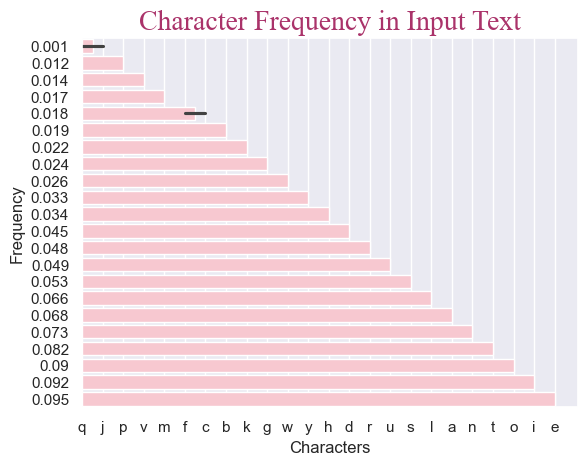

In [ ]:
## 1. Set up and Node Class Definition
import pandas as pd

class Node:
    def __init__(self,key,value):
        self.left = None
        self.right = None
        self.parent = None
        self.value = value
        self.key = key

## 2. Data Loading and Preprocessing
infile = open("GoldRush.txt")
inputdata = infile.read()
infile.close()
inputdata = inputdata.lower()
data = ""
for i in range(0,len(inputdata)):
    if inputdata[i]>='a' and inputdata[i]<='z':
        data+=(inputdata[i])

lst = []
for elem in data:
    lst.append(elem)
arr = pd.Series(lst)
freq = arr.value_counts(normalize=True, ascending=True)
freqdata = pd.DataFrame(freq)
plotdata = freq.reset_index(drop=False)
plotdata = plotdata.rename(columns={"proportion":"Frequency","index":"Characters"})
plotdata = plotdata.round(3)
freqdata.columns=['Frequency']


## 3. Huffman Tree Construction (Using Node Class)
mynodes = {}

for i in range(0,freqdata.size):
    node = Node(freqdata.index[i],freqdata.iloc[i])
    mynodes[freqdata.index[i]]=node

while(freqdata.size!=1):
    num1 = freqdata.index[0]
    freq1 = freqdata.iloc[0]
    num2 = freqdata.index[1]
    freq2 = freqdata.iloc[1]
    freqnew = freq1 + freq2
    newkey = f"({num1},{num2})"
    left = mynodes[num1]
    right = mynodes[num2]
    parent = Node(newkey, freqnew)
    parent.left = left
    parent.right = right
    left.parent = parent
    right.parent = parent
    mynodes[newkey]=parent
    freqdata.loc[newkey]=freqnew
    freqdata = freqdata.drop(index=[num1, num2])
    freqdata = freqdata.sort_values(by='Frequency',ascending=True)


## 4. Huffman Code Generation
codes = {}
length = len(mynodes)
for elem in mynodes:
    if(len(elem)>1):
        continue
    encoding = []
    curr=mynodes[elem]
    while curr.parent!=None:
        if curr.parent.left==curr:
            encoding.append('0')
        else:
            encoding.append('1')
        curr=curr.parent
    encoding = "".join(reversed(encoding))
    codes[elem]=encoding

## 5. Generated Code Analysis and Compression Metrics
comp = []
for j in range(0,len(data)):
    comp.append(codes[data[j]])
compver = "".join(comp)

ogsz = 8*len(data)
newsz = len(compver)
changesz = round(((ogsz-newsz)/ogsz)*100)
ogavg = ogsz/len(data)
newavg = newsz/len(data)

print("The data has been compressed by " + str(changesz) + "% through Huffman Coding (as compared to standard ASCII encoding of 8 bits/character)")

## 6. Project Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid', palette='pastel')
dataplot = sns.barplot(data=plotdata, x='Characters', y='Frequency', orient ="y", color="pink")
myfont = {'family':'serif','size':'20'}
plt.title("Character Frequency in Input Text",fontdict=myfont, color='#AA336A')
plttext = plt.Text(0.5, 1.0, 'Character Frequency in Input Text')

